<a href="https://colab.research.google.com/github/majulachavan/AIML/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os,datetime

In [ ]:
 mnist=tf.keras.datasets.mnist
 

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


shape is (28, 28)


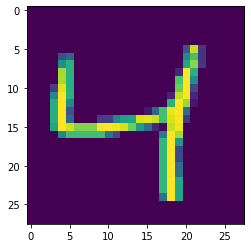

first digit in ytrain is 4


In [ ]:
print('shape is',xtrain[0].shape)
import matplotlib.pyplot as  plt
plt.imshow(xtrain[2])
plt.show()
print("first digit in ytrain is",ytrain[2])

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
ytest.shape

(10000,)

In [ ]:
xtrain,xtest=xtrain/255.0,xtest/255.0

In [ ]:
def create_model():
  model=tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10,activation='softmax')
  ])
  return model

In [ ]:
model=create_model()

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
logdir=os.path.join("logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)


In [ ]:
checkpoint_path='Model_checkpoint/cp/{epoch:04d}.ckpt'
checkpoint_dir=os.path.dirname(checkpoint_path)
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,monitor='val_acc',verbose=1,save_weights_only=True,save_freq='epoch'
)

In [ ]:
history = model.fit(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest),callbacks=[tensorboard_callback,checkpoint_callback])
loss,acc= model.evaluate(xtest,ytest,verbose=1)
print("original model , accuracy:{:5.2f}%".format(100*acc))

Epoch 1/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.6307 - accuracy: 0.8368
Epoch 1: saving model to Model_checkpoint/cp/0001.ckpt
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6299 - accuracy: 0.8370 - val_loss: 0.3399 - val_accuracy: 0.9100
Epoch 2/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.3397 - accuracy: 0.9042
Epoch 2: saving model to Model_checkpoint/cp/0002.ckpt
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3396 - accuracy: 0.9043 - val_loss: 0.2753 - val_accuracy: 0.9242
Epoch 3/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.2875 - accuracy: 0.9191
Epoch 3: saving model to Model_checkpoint/cp/0003.ckpt
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2875 - accuracy: 0.9190 - val_loss: 0.2395 - val_accuracy: 0.9338
Epoch 4/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.2523 - accuracy: 0.9282
Epoch 4: saving model to Model_checkpoint/cp/

In [ ]:
model.save('MyModel',save_format='tf')

In [ ]:
loaded_model=tf.keras.models.load_model('MyModel')
loaded_loss,loaded_acc=loaded_model.evaluate(xtest,ytest,verbose=1)
print("Loaded model , accuracy : {:5.2f}%".format(100*loaded_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1959 - accuracy: 0.9444
Loaded model , accuracy : 94.44%


In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

Launching TensorBoard...